# K-Means Clustering

Here, we're going to use some synthetic data that we've created to be in three clusters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

x1 = np.random.normal(loc=0.75, size=25)
y1 = np.random.normal(loc=6.0, size=25)
x2 = np.random.normal(loc=4.0, size=25)
y2 = np.random.normal(loc=2.0, size=25)
x3 = np.random.normal(loc=8.0, size=25)
y3 = np.random.normal(loc=6.0, size=25)

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

## Plotting

Let's plot the data to see what it looks like

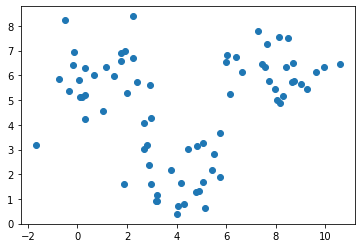

In [2]:
plt.scatter(x,y)

## K-Means Function

Let's write a function that takes x, y and k (the number of clusters) as input. The first step is to randomize the initial centers of the clusters. From there, we enter a loop where we calculate the clusters from the center, and then we calculate the new centers from the clusters.  We repeat this for some number of steps.  Let's add in some plotting after each of the calculating clusters and calculating centers steps.

In [17]:
def kmeans(x,y,k,n_iter=10):
    centers_x = np.min(x)+np.random.random(k)*(np.max(x)-np.min(x))
    centers_y = np.min(y)+np.random.random(k)*(np.max(y)-np.min(y))
    centers = np.c_[centers_x, centers_y]
    
    plt.scatter(x,y)
    plt.scatter(centers[:,0], centers[:,1], color='r', marker="*")
    
    for n in range(n_iter):
        clusters = []
        for i in range(len(x)):
            min_d = 10000
            for j in range(k):
                d = np.sqrt((x[i]-centers[j,0])**2+(y[i]-centers[j,1])**2)
                if (d < min_d):
                    cc = j
                    min_d = d
            clusters.append(cc)
            
        plt.figure()
        plt.scatter(x,y,c=clusters)
        plt.scatter(centers[:,0], centers[:,1], color='r', marker="*")
        plt.title("After cluster update "+str(n+1))
        centers = []
        for j in range(k):
            all_x = []
            all_y = []
            for i in range(len(x)):
                if (clusters[i] == j):
                    all_x.append(x[i])
                    all_y.append(y[i])
            centers.append([np.mean(all_x), np.mean(all_y)])
            
        centers = np.array(centers)
        plt.figure()
        plt.scatter(x,y,c=clusters)
        plt.scatter(centers[:,0], centers[:,1], color='r', marker="*")
        plt.title("After center update "+str(n+1))

## Running K-Means

Let's now run it for different numbers of centers (starting with 3). 

/var/folders/21/q__fgck93vvfv57xw8wq4n9w0000gn/T/ipykernel_10419/2908020695.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


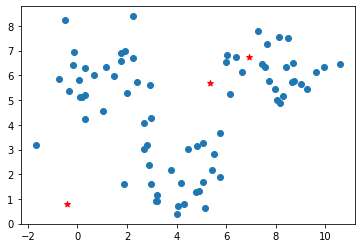

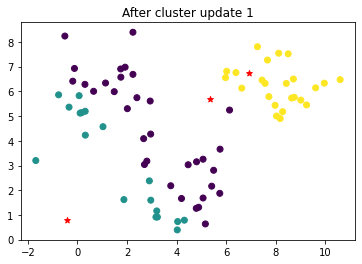

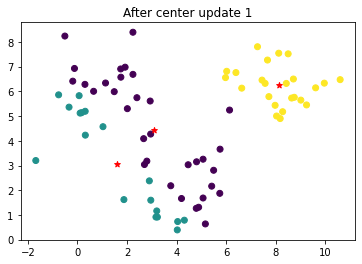

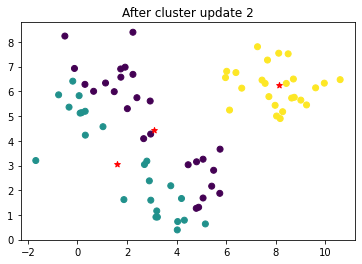

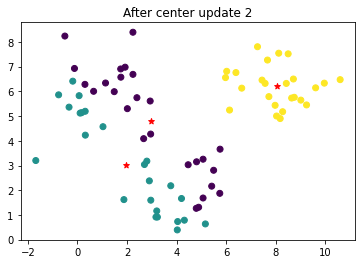

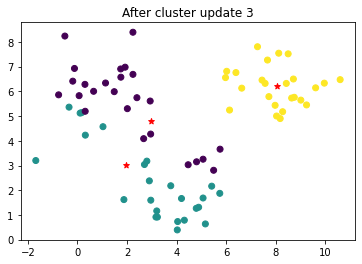

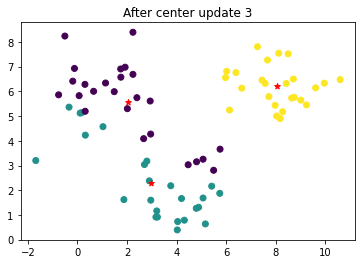

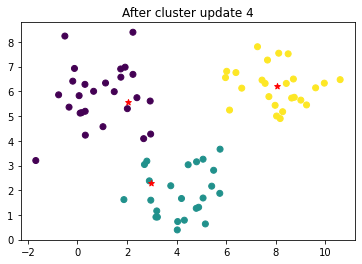

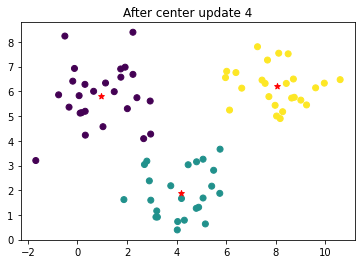

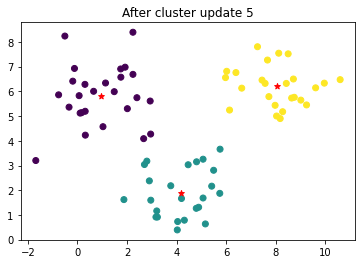

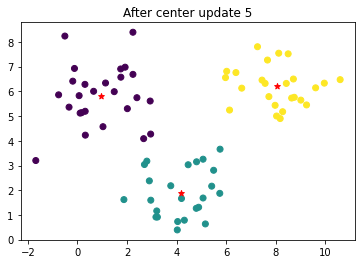

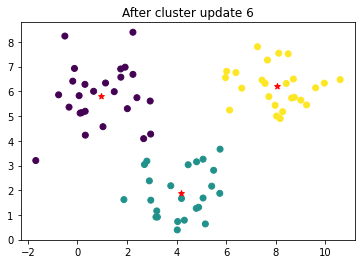

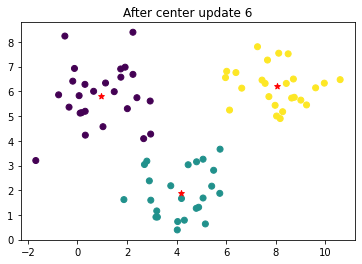

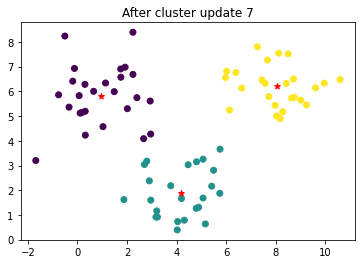

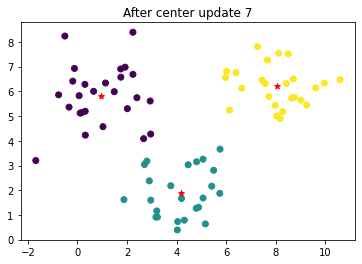

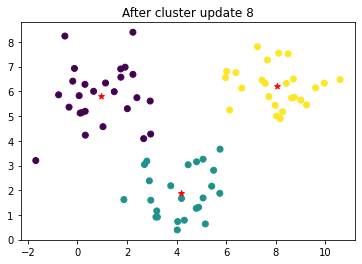

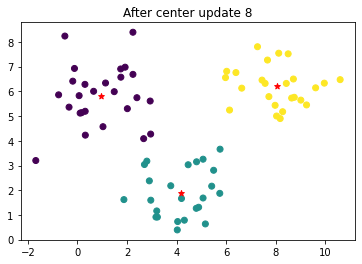

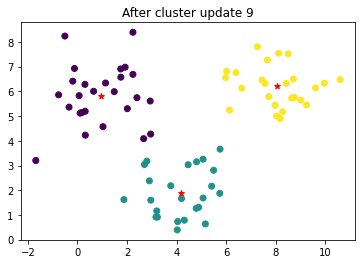

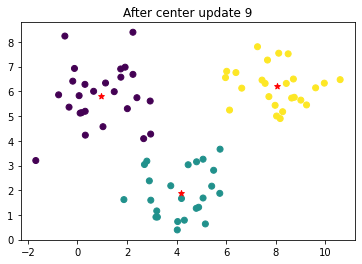

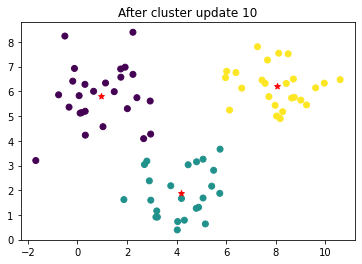

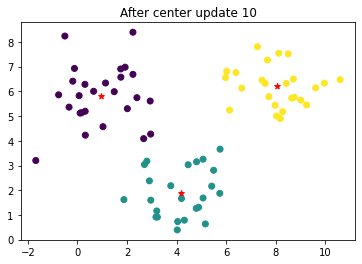

In [18]:
kmeans(x,y,3)